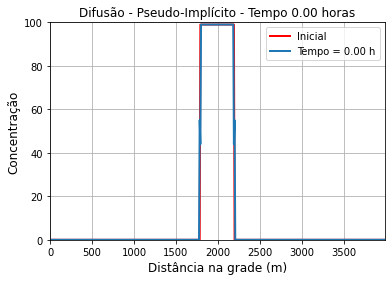

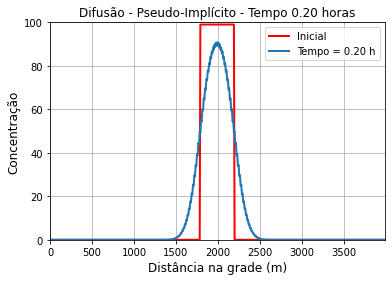

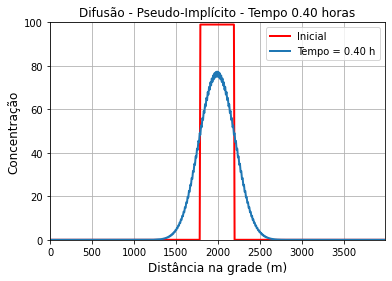

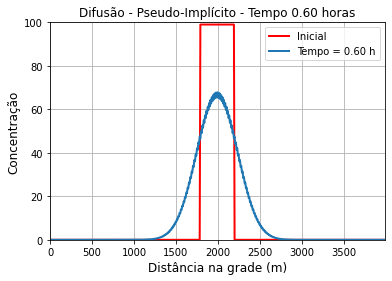

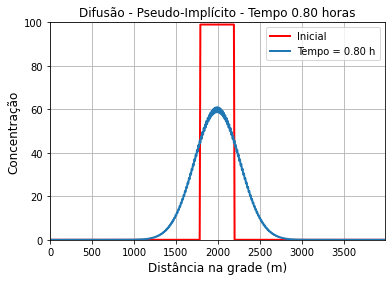

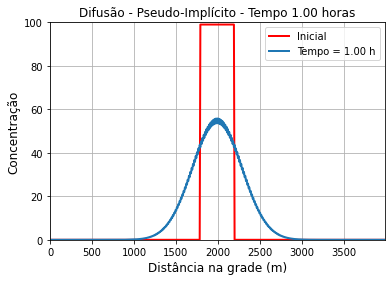

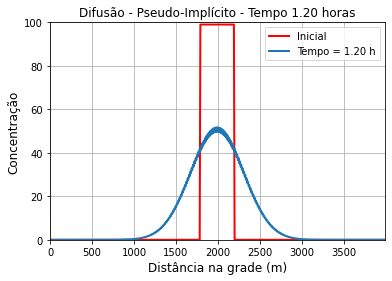

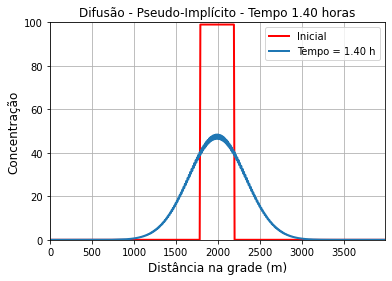

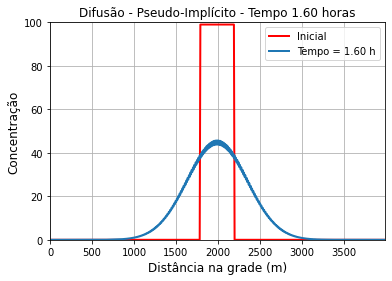

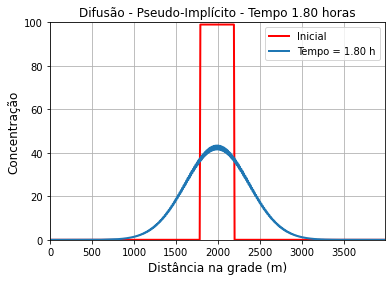

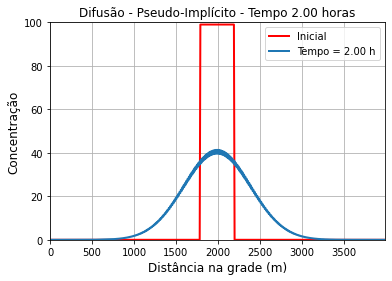

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
jmax = 500  # número de pontos de grade
nmax = 1900  # número de passos de tempo

# Condição inicial
fatu = np.zeros(jmax)
fatu[224:275] = 99  # Sinal retangular (ajuste de índice para Python 0-indexed)
fcin = fatu.copy()

d = 10    # Difusividade em m^2/s
dt = 4    # Intervalo de tempo em s
dx = 8    # Espaçamento da grade em m
q = d * dt / (dx ** 2)  # Parâmetro de difusão
xgrid = np.arange(jmax) * dx  # Grid de posições

# Esquema pseudo-implícito centrado no tempo e no espaço
fant = fatu.copy()
fren = fatu.copy()
freqplot = 180
kplot = 179

# Loop de tempo
for n in range(2, nmax):
    tempo = n * dt
    kplot += 1
    
    # Atualização do esquema pseudo-implícito
    fren[1:-1] = (fant[1:-1] + 2 * q * (fatu[2:] - fant[1:-1] + fatu[:-2])) / (1 + 2 * q)
    
    # Garantir que a concentração seja não-negativa
    fren[fren < 0] = 0

    # Plotar os resultados a cada freqplot passos de tempo
    if kplot == freqplot:
        kplot = 0
        plt.figure(1)
        plt.plot(xgrid, fcin, 'r', label='Inicial', linewidth=2)
        plt.plot(xgrid, fren, label=f'Tempo = {tempo / 3600:.2f} h', linewidth=2)
        plt.grid(True)
        plt.axis([xgrid[0], xgrid[-1], 0, 100])
        plt.title(f'Difusão - Pseudo-Implícito - Tempo {tempo / 3600:.2f} horas', fontsize=12)
        plt.xlabel('Distância na grade (m)', fontsize=12)
        plt.ylabel('Concentração', fontsize=12)
        plt.legend()
        plt.show()
        plt.pause(0.5)

    # Atualizar variáveis para o próximo passo de tempo
    fant = fatu.copy()
    fatu = fren.copy()